# Advanced data analysis: group project

By delivering this notebook, we confirm that the code presented was developed by the following students.

## Student 1: Adrien Robert Justus, 53148
## Student 2: Frank Andreas Bauer, 53121


In the solutions for exercises 1 to 5 you should include necessarily one solution using Pandas/scikit learn and one using Spark.

Some useful links:
* [ACM DEBS 2015 Grand Challenge](http://www.debs2015.org/call-grand-challenge.html)

* [Pandas documentations](https://pandas.pydata.org/docs/)

* [scikit-learn](https://scikit-learn.org/stable/)

* [Spark web site](https://spark.apache.org/)

* [Spark MLlib main page](https://spark.apache.org/mllib/)
* [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)

* [Spark GraphX main page](https://spark.apache.org/graphx/)
* [Spark GraphFrames main page](https://graphframes.github.io/graphframes/docs/_site/index.html)
* [Spark GraphFrames User Guide](https://graphframes.github.io/graphframes/docs/_site/user-guide.html)

Run the following cell just to check if it is running in COLAB.

In [1]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules

In [2]:
IN_COLAB

True

In [3]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules
IN_COLAB

True

## Install software

The following cell will install Spark, if the notebook is running on COLAB. 

Before running this cell, you should access the following link [https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing](https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing) and "Add Shortcut to Drive".


In [4]:
# Install needed software
# Run this cell once before running the other cells in the notebook
if IN_COLAB:
    !apt-get install openjdk-11-jdk-headless
    !pip install pyspark    

!pip install gdown
!mkdir checkpoint



Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.17+8-1ubuntu2~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 40 kB/s 
     |████████████████████████████████| 199 kB 57.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=545f6171c092c598db3adc6816db767a2367337ba2c329cd1fd2c60828c43a9a
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars graphframes-0.8.2-spark3.2-s_2.12.jar pyspark-shell'


--2022-12-05 09:06:27--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 108.156.83.15, 108.156.83.37, 108.156.83.69, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|108.156.83.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.06s   

2022-12-05 09:06:27 (3.90 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



## Setup Data

The first time you run the notebook, before running this cell, you should access the following link https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing and select the "Add Shortcut to Drive". This will add a shortcut to the datasets to your Google Drive.

The following cell will mount the directory into Colab environment, so that it can be accessed as a local file.


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
#Select the dataset you want to use by uncommnting the appropriate line and running this cell

#Small dataset 100K lines
FILENAME="/content/drive/MyDrive/group2223/tiny.csv"

#Default dataset 2M lines
#FILENAME="/content/drive/MyDrive/group2223/sample.csv"

#Huge dataset 173M lines - use only in exercise 0
#FILENAME="/content/drive/MyDrive/group2223/sorted_data.csv"



### Alternative way to access data

Alternatively you can access data by downloading the data into the colab running environment. The following sets download different datasets - download the one you need.

Run the following cell to download a **tiny** dataset. You can download it to you computer using this URL: https://drive.google.com/file/d/12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ



In [ ]:
!gdown 12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
!unzip -u tiny.csv.zip
!rm tiny.csv.zip
FILENAME="tiny.csv"


Downloading...
From: https://drive.google.com/uc?id=12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
To: /content/tiny.csv.zip
100% 6.87M/6.87M [00:00<00:00, 95.0MB/s]
Archive:  tiny.csv.zip
  inflating: tiny.csv                


Alternatively, run the following cell to download the **default** dataset. You can download the file to your computer using this URL: 
https://drive.google.com/file/d/1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A

In [ ]:
!gdown 1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A
!unzip -u sample.csv.zip
!rm sample.csv.zip
FILENAME="sample.csv"


Downloading...
From: https://drive.google.com/uc?id=1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A
To: /content/sample.csv.zip
100% 136M/136M [00:00<00:00, 253MB/s]
Archive:  sample.csv.zip
  inflating: sample.csv              


You can still run the following cell (this will take some time) to download a **huge** dataset - with 33GB !!! You can download the file to you computer using this URL: https://drive.google.com/file/d/1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5/view?usp=share_link

Use this dataset **only** for computing the result of exercise 0.

In [ ]:
!gdown 1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5
!unzip -u sorted_data.csv.zip
!rm sorted_data.csv.zip
FILENAME="sorted_data.csv"


## Initialization

import libraries.

In [8]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.style.use('seaborn')


Let's start spark session and set *log* level to ERROR.

In [9]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Group project") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

if IN_COLAB : 
    spark.sparkContext.addPyFile('graphframes-0.8.2-spark3.2-s_2.12.jar')
else:
    spark.sparkContext.addPyFile('/usr/local/spark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')

spark.sparkContext.setCheckpointDir("checkpoint")


## Simple statistics

First program prints simple statistics.

In [10]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

statistics = spark.sql( """SELECT COUNT( DISTINCT medallion) AS num_medallion, 
                                  COUNT( DISTINCT hack_license) AS num_license,
                                  MIN( pickup_datetime) AS min_pickup,
                                  MAX( dropoff_datetime) AS max_dropoff,
                                  MAX( trip_time_in_secs) AS max_trip_time,
                                  MAX( trip_distance) AS max_trip_distance,
                                  MAX( total_amount) AS max_total_amount
                                  FROM data""")
statistics.show()


+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|num_medallion|num_license|         min_pickup|        max_dropoff|max_trip_time|max_trip_distance|max_total_amount|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|         6467|       9614|2013-01-01 00:00:00|2013-01-01 12:22:00|        10800|            50.47|          321.05|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+



## Ploting information

Example on how to plot information using matplotlib.

### First plot

This first plot helps showing that data has several invalid values.

Let's plot the pickups - you can see that there are points quite far from the expected locations. 

Plotting pickups


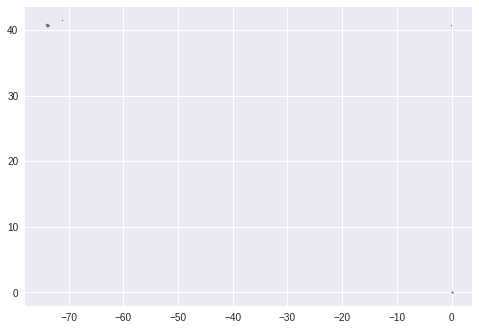

In [15]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

# Plotting all points is probably too much in many computers, so lets plot only a few 1000's
data1000 = spark.sql( "SELECT * FROM data LIMIT 1000")
pickups = data1000.collect()

print('Plotting pickups')
plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            s=1)
plt.show()


### Plotting heatamps

This example shows how to **plot heatmaps** and how to **create a grid** with coordinates -- note that we need to group nearby coordinates together or (almost) every coordinate will be unique.

The example creates a grid, with cell of 150m of side (commented out the code for cells of 500m of side). It also filters out data that is outside of the area of interest - defined by northLatitude, southLatitude, westLatitude, eastLatitude coordinates.

\[From ACM DEBS 2015 Grand Challenge page\]

**Question 1**: Is the earth flat or how to map coordinates to cells?

**Answer**: For the challenge we allow a simplified flat earth assumption for mapping coordinates to cells in the queries. You can assume that a distance of 500 meter south corresponds to a change of 0.004491556 degrees in the coordinate system. For moving 500 meter east you can assume a change of 0.005986 degrees in the coordinate system.

Plotting pickups


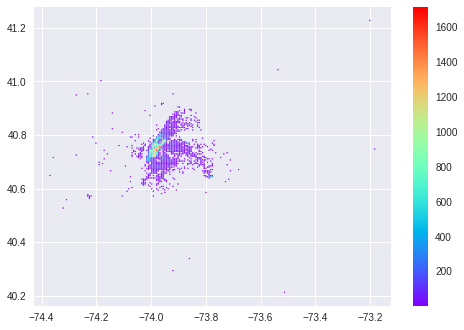

Plotting dropoffs


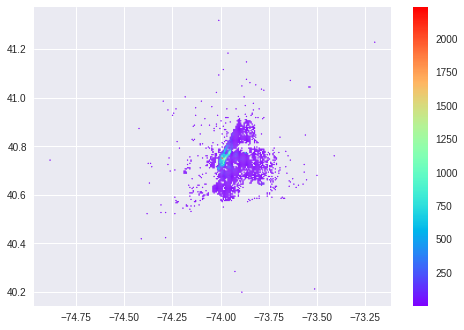

In [14]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 500 meters
latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep

# Squares of 150 meters
#latitudeStep = 0.0013474668
#longitudeStep = 0.0017958
#northLatitude = 40.95
#southLatitude = northLatitude - 300 * latitudeStep
#eastLongitude = -74.2
#westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

# Frequency for pickups
pickupsDF = spark.sql( """SELECT pickup_longitude, pickup_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY pickup_longitude, pickup_latitude""")
pickups = pickupsDF.collect()

print('Plotting pickups')
p = plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            c=[row.cnt for row in pickups],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()

# Statistics for dropoffs
dropoffsDF = spark.sql( """SELECT dropoff_longitude, dropoff_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY dropoff_longitude, dropoff_latitude""")
dropoffs = dropoffsDF.collect()

print('Plotting dropoffs')
p = plt.scatter([row.dropoff_longitude for row in dropoffs],
            [row.dropoff_latitude for row in dropoffs],
            c=[row.cnt for row in dropoffs],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()



## Exercise 0: another simple statistics

This example computes, for each license, the number of trips performed.

We have the code using Spark and Pandas, printing the time for doing the computation.
**Draw some conclusions** by comparing the time for performing the computation using Spark and Pandas, and also when using the different datasets - **Make sure you run each cell more than once and write down the last value**.

### Code: Spark

In [16]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

start_time = time.time()
mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")
statistics = spark.sql( """SELECT hack_license, COUNT(*) AS cnt FROM data GROUP BY hack_license""")
statistics.show()

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


+--------------------+---+
|        hack_license|cnt|
+--------------------+---+
|130328475AD7427AF...| 10|
|D4F2AE0988ECB2E42...|  9|
|DD97899ACAC51EF31...|  7|
|A7C47E60941315A0E...| 17|
|9911D66A4A796752D...|  8|
|88CB7A1006DB18438...| 24|
|069B5562096AF7684...|  7|
|28A7C858D9231A3EC...| 20|
|A7EE9AEDB7325F55F...| 18|
|4B6EFCBC110DB539E...| 17|
|AA33AA1CACC8C26E7...| 10|
|921E1C7C91CDCF1C6...| 19|
|616E057B1ACDB7B28...| 15|
|EFA12B2F45FC838E1...| 14|
|D0D1271283601BF84...| 27|
|138B0A7B7D3B898E4...| 12|
|0FBF11956EE14B253...| 11|
|8821CA9250E34A869...| 28|
|BE047851D97506885...|  7|
|02856AFC22881ABCA...| 16|
+--------------------+---+
only showing top 20 rows

Runtime = 1.185741901397705


### Results (Spark)

**Tiny dataset**

The time to process was : **1.01** seconds.

**Default dataset**

The time to process was : **8.36** seconds.

**Large dataset**

The time to process was : **782** seconds.


### Code: Pandas library

In [17]:
start_time = time.time()
mySchema = ["medallion", "hack_license", "pickup_datetime",
            "dropoff_datetime", "trip_time_in_secs", "trip_distance",
            "pickup_longitude", "pickup_latitude", "dropoff_longitude",
            "dropoff_latitude", "payment_type", "fare_amount", 
            "surcharge", "mta_tax", "tip_amount",
            "tolls_amount", "total_amount"]

dataset_csv = pd.read_csv(FILENAME,names=mySchema)
result = dataset_csv.groupby("hack_license").count()
print(result)

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


                                  medallion  pickup_datetime  \
hack_license                                                   
000CCA239BFDC0ABE2895AC9086C4290         11               11   
001C8AAB90AEE49F36FCAA7B4136C81A         14               14   
0025133AD810DBE80D35FCA8BF0BCA1F         11               11   
002FE84F0EA642650A650C2BE875DDD3          1                1   
0031E634F79DA0E6B01239A8017F5928          1                1   
...                                     ...              ...   
FFEE627F76A3A498DA53E200821FDEE9          6                6   
FFF20BA1518E14B3B23F79DDDE1CA7E6          8                8   
FFF5AD65C673251C1F275CF5B43EC414          1                1   
FFF657CFEC6A06384C97ACB500916913          4                4   
FFF909B1353148850AD3E40BB878618B         10               10   

                                  dropoff_datetime  trip_time_in_secs  \
hack_license                                                            
000CCA239BFDC0ABE2895

### Results (Pandas)

**Tiny dataset**

The time to process was : **0.48** seconds.

**Default dataset**

The time to process was : **8.56** seconds.

**Large dataset**

The time to process was : **Error, kernal died**.

#### Results discussion

**TO BE COMPLETED**

When looking at the runtimes, it is obvious that the runtime generally increases with the size of the dataset. However, if we only compare the spark times with the pandas time, we notice noticeable differences for each dataset: 
For the small one, pandas is faster than spark. For the default dataset, spark is slightly quicker and the large dataset is only usable on spark. 

This is because PySpark is an in-memory, distributed processing engine that allows us to process data efficiently in a distributed fashion, making it more suitable for computations on large datasets compared to pandas. 

## Cleaning Data

In [11]:
# 1. Delete taxi rides that are not within the coordinates of New York City
cleanedDF = dataset[(dataset['pickup_longitude'] < -73) & (dataset['dropoff_latitude'] > 40)]

# 2. Delete taxi rides that are either to short or not long enough (also to get rid of 0.0 values)
cleanedDF = cleanedDF[(cleanedDF['trip_time_in_secs'] > 60) & (cleanedDF['trip_distance'] > 0.1)]
print(cleanedDF.count())

cleanedDF = cleanedDF.toPandas()

# 3. Delete taxi rides that have way too high or too low fare amounts per time or distance 
# -> fare amout probably not set correctly by the taxi driver
cleanedDF['amountPerDistance'] = cleanedDF['fare_amount']/cleanedDF['trip_distance']
cleanedDF = cleanedDF[(cleanedDF['amountPerDistance'] < 50) & (cleanedDF['amountPerDistance'] > 2)]
cleanedDF['amountPerSecs'] = cleanedDF['fare_amount']/cleanedDF['trip_time_in_secs']
cleanedDF = cleanedDF[(cleanedDF['amountPerSecs'] < 0.1) & (cleanedDF['amountPerSecs'] > 0.01)]
print(cleanedDF.shape)

96268
(95847, 19)


In [12]:
clean = spark.createDataFrame(cleanedDF)
clean.createOrReplaceTempView("dataDF");
spark.sql("select count(*) from dataDF");

## Exercise 1

Let's start by trying to help the city to identify which new bus routes should be introduced. To this end, you should find the most frequent routes whose distance is above a given treshold (defined by you).

For establishing these routes, we suggest that you use a grid of 500m of side.

In [37]:
# most common routes with threshold > 1 mile
exercise1 = spark.sql( """SELECT 
                            CONCAT(longround(pickup_longitude),",", latround(pickup_latitude)) AS pickup, 
                            CONCAT(longround(dropoff_longitude),",", latround(dropoff_latitude)) AS dropoff, 
                            COUNT(medallion) AS count_routes
                            FROM dataDF
                          WHERE trip_distance > 1
                          GROUP BY
                            pickup, dropoff
                          ORDER BY
                            count_routes DESC LIMIT 10
                          """)
exercise1.show()

+--------------------+--------------------+------------+
|              pickup|             dropoff|count_routes|
+--------------------+--------------------+------------+
|-73.967797,40.756...|-73.991741,40.751...|          63|
|-73.973783,40.756...|-73.991741,40.751...|          62|
|-73.955825,40.774...|-73.973783,40.751...|          42|
|-73.973783,40.751...|-73.991741,40.751...|          42|
|-73.985755,40.765...|-73.991741,40.751...|          41|
|-73.991741,40.751...|-73.979769,40.751...|          40|
|-73.967797,40.760...|-73.967797,40.760...|          40|
|-73.991741,40.769...|-73.991741,40.751...|          39|
|-73.985755,40.720...|-73.979769,40.742...|          38|
|-73.985755,40.729...|-73.991741,40.747...|          38|
+--------------------+--------------------+------------+



#### Discussion

**Explain your code and discuss results**

First, we decided to use the cleaned dataset, to ensure that we are only using trips within NYC and with a realistic fare amount per distance or time.

Next, we created a table grouped by the rounded longitudes and latitudes of each pickup and dropoff location (500m), aggregated by the count of trips. We also defined that a trip should be at least 1 mile, because at this distance it seems reasonable for us to rather use a bus than to walk.

We can see that under these restrictions the most popular trip was done 63 times in the exmined timeframe. Also, one one could recommend to, e.g. establish bus routes at every connection that was used over 40 times.

## Exercise 2

The taxi trips can be classified in two categories, depending on whether the client has given a tip or not (or alternatively in three categories - no tip, low percentage tip, high percentage tip). Propose a method to predict the class of a given trip (for the prediction, you cannot use the value of the tip).


In [20]:
ex2 = cleanedDF
# Create a column with a boolean if a tip was given or not
ex2['tip'] = np.where(ex2['tip_amount'] > 0, True, False)

# Drop the unknown payment type ('UNK')
ex2.drop(ex2[ex2['payment_type'] == 'UNK'].index, inplace = True)

# Map the payment type to a number to make it correlate correctly with the column 'tip'
mapping = {'CSH': 1, 'CRD': 2}
ex2["payment_type"] = ex2["payment_type"].map(mapping)

In [21]:
corrmat = ex2.corr().abs()
pearson = corrmat['tip']
pearson.sort_values(axis = 0, ascending = False)

tip                  1.000000
payment_type         0.944800
tip_amount           0.671779
total_amount         0.163880
fare_amount          0.044455
trip_time_in_secs    0.043849
trip_distance        0.042763
amountPerDistance    0.036502
surcharge            0.031515
pickup_longitude     0.030150
tolls_amount         0.026995
pickup_latitude      0.025169
dropoff_latitude     0.015004
mta_tax              0.010435
amountPerSecs        0.008174
dropoff_longitude    0.007215
Name: tip, dtype: float64

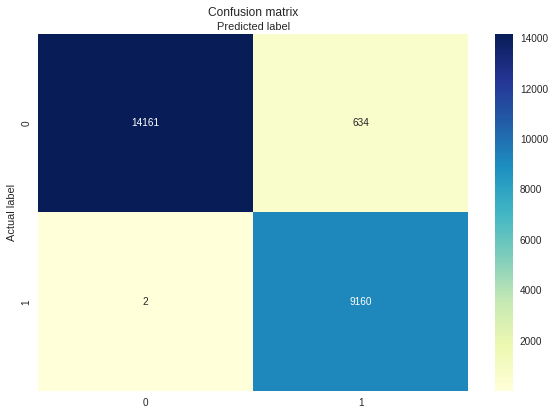

Precision: 0.9352664896875638
Recall: 0.9997817070508622
Accuracy: 0.9734524356138081


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = ex2[['payment_type','fare_amount','trip_time_in_secs', 'trip_distance']] # Features
y = ex2['tip'] # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# TN, FP 
# FN, TP

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [23]:
# This shows that customers paying in cash do not give (recorded) tips
ex2_cash = ex2[ex2['payment_type']==1]
print(ex2_cash['tip_amount'].unique())
ex2_cash[['tip_amount','tip']].nunique()

[0.]


tip_amount    1
tip           1
dtype: int64

In [24]:
# This shows that customers paying with card are often giving a tip
ex2_card = ex2[ex2['payment_type']==2]
#print(ex2_card['tip_amount'].unique())
ex2_card[['tip_amount','tip']].nunique()

tip_amount    442
tip             2
dtype: int64

-----------------------------------------------------
The mean tip percentage by people paying with card is: 20.27660779327001


<ipython-input-25-85c8c44902e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex2_card['tip_percentage'] = (ex2_card['tip_amount']/ex2_card['fare_amount'])*100


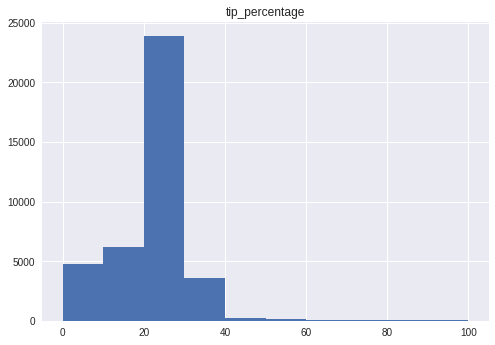

In [25]:
# This shows the distribution of tips given by customers paying with card
ex2_card['tip_percentage'] = (ex2_card['tip_amount']/ex2_card['fare_amount'])*100
ex2_card.hist('tip_percentage',bins=10, range=[0, 100])
print('-----------------------------------------------------')
print('The mean tip percentage by people paying with card is:', ex2_card['tip_percentage'].mean())

## **Discussion**

A logistic regression is used as a model to classify whether a tip is given or not by the customer. The predicted label is 'tip' (True or False) and the input features are 'payment_type', 'fare_amount','trip_time_in_secs' & 'trip_distance', because they correlate the most with the , especially 'payment_type' with a very strong positive correlation of 0.944800.

The model manages to score pretty well. The explanations for that could be the following: In this dataset..
*   ... there are no recorded tips by people paying in cash. It can be assumed that tips in cash are deliberately not recoreded by the taxi driver e.g., to avoid taxation.
*   ... the great majority of people paying by card give a tip (around 20%) - obviously these tips are tracked, because credit card payments are traceable.

Therefore, the classfication model manages to get an almost perfect recall of 0.9997817070508622 (close to 1), because it assumes correctly that people paying by cash will not give a (recorded) tip (FN = only 2). The precision is also very high (0.9352664896875638), yet the model sometimes predicts that a customer has given a tip, even though he has given not one (FP) - you could say that the model supposes that the customers are more "generous" with tips than they are in reality.

All in all, this leads to a generally high accuracy of 0.9734524356138081.

## Exercise 3

The third question intends to help taxi drivers to decide to which area of the city they should go next. To this end, we could have a web site/mobile app where the drivers could check the best area at a given moment. To support such application efficiently, it would be necessary to have a pre-computed index with the value for each area and period of time (e.g. combining the week day and a period of one hour). 

You should create the program to create such index. The output tuples should be something like: longitude latitude day_of_week hour value.

Define your own metric for the value of an area. Parameters that may be included in such metric include: the number of pickups in the area, the amount collected in the trip, the average time a taxi is idle in the area, etc.

Besides presenting the code, explain the rationale of your solution.

**Note:** SQL functions date(col), dayofweek(col) and hour(col) return, respectively, the date, day of week and hour of a datatime in column col.

In [27]:
#creating a table with the rounded longitude and latitude (500)
#dataDF.createOrReplaceTempView("dataDF")

spark.sql( """SELECT *, 
              CONCAT(longround(pickup_longitude),",", latround(pickup_latitude)) AS pickup, 
              CONCAT(longround(dropoff_longitude),",", latround(dropoff_latitude)) AS dropoff
              FROM dataDF
           """).createOrReplaceTempView("dataDF3")

DF3 = spark.sql("SELECT * FROM dataDF3")

In [28]:
#converting table to pandas dataframe and adding hour and day columns
ex3 = DF3.toPandas()
ex3['hour'] = ex3['pickup_datetime'].dt.hour
ex3['day'] = ex3['pickup_datetime'].dt.day
ex3.head()

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,total_amount,amountPerDistance,amountPerSecs,pickup,dropoff,hour,day
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,...,0.5,0.0,0.0,4.5,7.954545,0.029167,"-73.955825,40.71586403599999","-73.961811,40.71586403599999",0,1
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,...,0.5,0.0,0.0,5.0,5.633803,0.033333,"-73.973783,40.75179648399999","-73.967797,40.76077959599999",0,1
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,...,0.5,0.0,0.0,5.0,8.333333,0.033333,"-74.003713,40.72035559199999","-74.003713,40.724847147999995",0,1
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,...,0.5,0.0,0.0,5.0,6.557377,0.033333,"-73.985755,40.724847147999995","-73.985755,40.72933870399999",0,1
4,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,...,0.5,0.0,0.0,7.5,3.801170,0.027083,"-73.955825,40.77874581999999","-73.967797,40.76077959599999",0,1


In [29]:
#creating "pickup dataframe" 
ex3_pickup = ex3.groupby(['day','hour', 'pickup']).aggregate({'medallion':'count','fare_amount':'mean', 'tip_amount':'mean', 'trip_time_in_secs':'mean'})
ex3_pickup.columns = ['count_pickups', 'avg_fare', 'avg_tip', 'avg_triptime']
EX3_pickup = ex3_pickup.reset_index()

In [30]:
#creating "dropoff dataframe"
ex3_dropoff = ex3.groupby(['dropoff']).aggregate({'medallion':'count'})
ex3_dropoff.columns = ['count_dropoffs']
EX3_dropoff = ex3_dropoff.reset_index()

In [31]:
#merging "dropoff datframe" on "pickup datframe" to have pickup/dropoff statistics per location in one df
DF3_combined = EX3_pickup.merge(EX3_dropoff, left_on='pickup', right_on='dropoff', how = 'left')
DF3_combined = DF3_combined.fillna(0)
DF3_combined['count_dropoffs'] = DF3_combined['count_dropoffs'].astype(int)
DF3_combined['location'] = DF3_combined['pickup']

In [32]:
#computing the "value" algorithm
DF3_combined['value'] = (DF3_combined['count_pickups'] - DF3_combined['count_dropoffs']) * ((DF3_combined['avg_fare'] + DF3_combined['avg_tip'])/ DF3_combined['avg_triptime'])

In [33]:
#creating the final df for our program
finalDF = DF3_combined[['day', 'hour', 'location', 'count_pickups', 'count_dropoffs', 'avg_fare', 'avg_tip', 'value']]
finalDF = finalDF.loc[finalDF['count_pickups'] > 5]
finalDF.nlargest(5,'value')

,day,hour,location,count_pickups,count_dropoffs,avg_fare,avg_tip,value
280,1,0,"-73.967797,40.77425426399999",57,40,9.982456,0.721053,0.284312
4752,1,10,"-73.878007,40.77425426399999",8,1,29.437500,1.650000,0.205780
36,1,0,"-73.878007,40.77425426399999",7,1,29.071429,3.192857,0.142943
3655,1,7,"-73.776245,40.64849069599999",6,3,54.083333,1.333333,0.103261
4757,1,10,"-73.883993,40.77425426399999",9,6,21.555556,3.175556,0.078373


In [34]:
#create program
def next_pickup(day, hour): 
  return finalDF[['location','day', 'hour', 'value']].loc[(finalDF.day == day) & (finalDF.hour == hour + 1)].nlargest(1, 'value')

In [35]:
#test
next_pickup(1, 9)

,location,day,hour,value
4752,"-73.878007,40.77425426399999",1,10,0.20578


#### Discussion

**Explain your code and discuss results**

To build the dataframe for our program, we first created a table with rounded longitudes and latitudes (500m). Next, we created two dataframes, to get the number of pickups and dropoffs as well as the mean total amount that was paid for each pickup location. Our algortithm for the "value" of each location is the following: 

**Location Value  = (count(pickups) - count(dropoffs)) * ((avg(fare_amount) + avg(tip_amount)/ avg(tip_triptime))**

The idea is that locations with more pickups than dropoffs are more valuable as there are less taxis competing with eachother -> smaller idle time. Additionaly, we take the sum of the average amount spend on fare and tips, devided by the avergage triptime at this location into account, as this is also intersting for the taxi driver. We exlcude the the toll amount as well as the surcharge as they are irrelevent for the taxi driver. Last but not least, we only inculde locations with more the 5 pickups as a minimum amount for the demand.

## Exercise 4

The fourth question intends to help define the location of taxi ranks (the places where taxis stop waiting for collecting clients) in a way that tries to minimize the distance a client needs to travel to reach the taxi rank.

Consider that you want to establish, at least, 100 taxi ranks but no more than 150 - present the code that defines the number and locations of the ranks.

**Note:** This dataset is for NYC taxis. So, pickups outside of the city are infrequent and not representative of the demand in such areas. As such, you should focus on pickups in a square that includes NYC (it is ok if the square includes parts outside of the city). Use, for example, the following square:
```
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92
```

**Suggestion:** Plot your results as a heatmap, with the color being a measurement of the value of the taxi rank; use the visual feedback to enhance your solution.

In [40]:
# Filtering Region
#ex4 = dataDF.toPandas()
ex4 = cleanedDF
DF4 = ex4[['pickup_longitude','pickup_latitude']][((ex4['pickup_longitude'] < -73.92) & (ex4['pickup_longitude'] > -74.03)) & 
             ((ex4['pickup_latitude'] < 40.86) & (ex4['pickup_latitude'] > 40.68))]
DF4.head()

,pickup_longitude,pickup_latitude
0,-73.956528,40.716976
1,-73.973145,40.752827
2,-74.004173,40.720947
3,-73.987373,40.724861
4,-73.955383,40.779728


In [41]:
#building our model
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

x = DF4
sse, db, slc = {}, {}, {}
for k in range(100, 151,10): #we are not using the complete range, as it takes too long to run on our computers
    kmeans = KMeans(n_clusters = k, max_iter = 100, n_init = 10, init = 'k-means++', random_state=0).fit(x)
    clusters = kmeans.labels_
    slc[k] = silhouette_score(x, clusters)

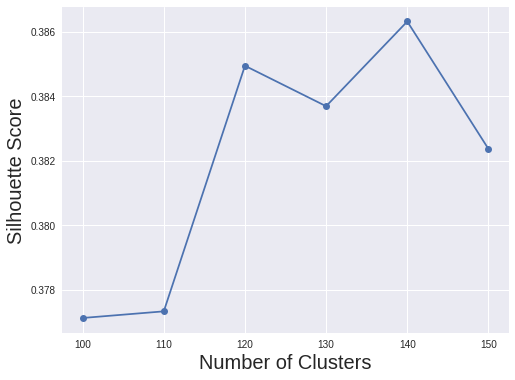

In [42]:
#displaying the silhoute score
plt.figure(figsize=(8, 6))
plt.plot(list(slc.keys()), list(slc.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.show()

In [44]:
#computing model with k=140
model = KMeans(n_clusters=140, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = model.fit_predict(DF4)

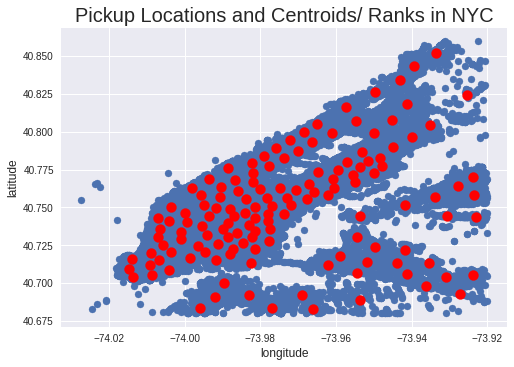

In [45]:
plt.scatter(DF4['pickup_longitude'], DF4['pickup_latitude'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('longitude', fontsize=12)
plt.ylabel('latitude', fontsize=12)
plt.title('Pickup Locations and Centroids/ Ranks in NYC', fontsize=20)
plt.show()

In [46]:
#creating a df with the value of each taxi rank
cluster_location = model.cluster_centers_
cluster_location.shape
cluster_locationDF = pd.DataFrame(cluster_location)
cluster_locationDF.columns = ['longitude', 'latitude']

labels = model.labels_
clusterCount = np.bincount(labels)
clusterCountDF = pd.DataFrame(clusterCount)
clusterCountDF.columns = ['value']

cluster_locationDF['value'] = clusterCountDF
cluster_locationDF.nlargest(5, 'value')

,longitude,latitude,value
6,-73.967697,40.755753,1589
118,-73.976827,40.751193,1477
92,-73.972933,40.756250,1449
132,-73.981294,40.742667,1347
1,-73.987958,40.718844,1346


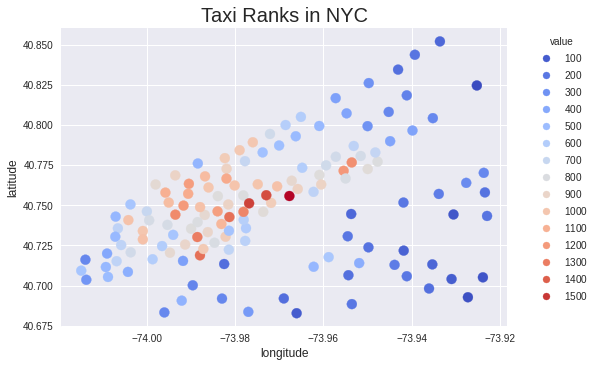

<Figure size 648x648 with 0 Axes>

In [47]:
ranks = plt.scatter(cluster_locationDF['longitude'], cluster_locationDF['latitude'], s=100, c=cluster_locationDF['value'], cmap='coolwarm')
plt.xlabel('longitude', fontsize=12)
plt.ylabel('latitude', fontsize=12)
plt.title('Taxi Ranks in NYC', fontsize=20)
plt.legend(*ranks.legend_elements(), title= 'value', fancybox=True, bbox_to_anchor=(1.2, 1))
plt.figure(figsize=(9, 9))
plt.show()

#### Discussion

**Explain the rationale of your solution, your code and discuss results**

First, we filtered our dataset to only have values inside our examined square. To find the ideal ranks, we decided to let a kmeans model compute centroids in a specific amount of clusters. In order to find the ideal number of clusters, we run mulitple versions in a range of k = 100-150  and use the model with the highest silhoute score. Last but not least, we associate a value to each centroid/ rank by the number of pickups in its respective cluster.

Looking at the results, we can see that the centroids/ ranks in the center of Manhattan generally have higher scores compared to ranks outside the city center.

## Exercise 5

For the fifth questions we wanted to identfiy communities within downtown NYC. A community, with respect to graphs, can be defined as a subset of nodes that are densely connected to each other and loosely connected to the nodes in the other communities in the same graph.

**Explain the problem you propose to solve**

In [66]:
downtownDF = cleanedDF[((cleanedDF['pickup_longitude'] < -73.92) & (cleanedDF['dropoff_longitude'] > -74.03)) & 
          ((cleanedDF['pickup_latitude'] < 40.86) & (cleanedDF['dropoff_latitude'] > 40.68))]


downtown = spark.createDataFrame(downtownDF)
downtown.createOrReplaceTempView("dataDF");
spark.sql("select count(*) from dataDF");

In [67]:
ex5 = spark.sql("""SELECT 
                            CONCAT(longround(pickup_longitude),",", latround(pickup_latitude)) AS pickup, 
                            CONCAT(longround(dropoff_longitude),",", latround(dropoff_latitude)) AS dropoff, 
                            COUNT(medallion) AS count_routes
                            FROM dataDF
                          GROUP BY
                            pickup, dropoff
                          """)

In [68]:
import networkx as nx
import community.community_louvain as community_louvain

ex5DF = ex5.toPandas()
ex5DF = ex5DF[ex5DF['count_routes']>5]

G = nx.from_pandas_edgelist(ex5DF, source='pickup', target='dropoff', edge_attr='count_routes', create_using=None, edge_key=None)
communities = community_louvain.best_partition(G, weight='count_routes', randomize=False, random_state=7)

In [86]:
coms = pd.Series(communities, name='Community')
coms.index.name = 'Range'
coms = coms.reset_index()
communityDF = coms

communityDF[['longitude','latitude']] = communityDF['Range'].str.split(',', expand=True)
communityDF['longitude'] = communityDF['longitude'].astype(float)
communityDF['latitude'] = communityDF['latitude'].astype(float)

# Filter again for NYC downtown, in case there are rounding errors through the data type conversion from string to float
communityDF = communityDF [((communityDF ['longitude'] < -73.92) & (communityDF ['longitude'] > -74.03)) & 
          ((communityDF ['latitude'] < 40.86) & (communityDF ['latitude'] > 40.68))]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


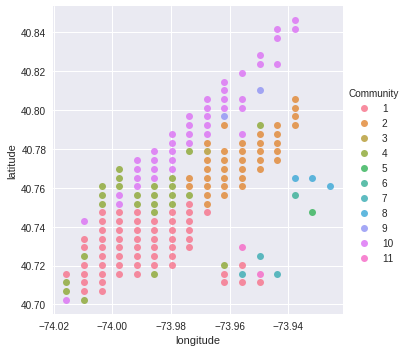

In [87]:
import seaborn as sns

sns.lmplot('longitude', 'latitude', data=communityDF, hue='Community', fit_reg=False)
plt.show()

In [88]:
communityDF['Community'].value_counts()

1     58
10    41
2     36
4     25
7      3
8      3
9      2
11     2
6      1
3      1
5      1
Name: Community, dtype: int64

#### Discussion

**Explain the rationale of your solution, your code and discuss results**

First, we excluded all trips that have not taken place in downtown NYC from the cleaned dataset. 

Then, (similar to Ex.1) we rounded the coordinates, grouped them and counted the amount of trips for each connection (pickup and dropoff pair).

Next we excluded any connection that took place less than 5 times, because we wanted to remove noise: Our communities should focus on the main connections.

After that we build a graph by using the from_pandas_edgelist() function from the networkx module with pickup as source, dropoff as target and count_routes as edge attribute.

Subsequently, to get a series of communities and their respective connections, we used the best_partition() function from the community_louvain module with count_routes as weight make sure that more popular connections are represented accordingly.

Then we created a communityDF by turning the series into a dataframe and splitting the coordinates (by ',') in their respective longitude and latitude. Moreover, we changed the data type from the longitude and latitude columns from string to float.

Finally, we plotted the communityDF using the lmplot() function from seaborn.

**Result:** 
The graph shows that there are four main communities, that resemble some neighborhoods of NYC closely.

Community 1: City center of Manhattan (Midtown, Chelsea, Soho)
</br>
Community 2: Upper East Side
</br>
Community 4: Midtown West
</br>
Community 10: Upper West Side








